# Customer churn prediction



Goal: predict whether a customer will change telecommunications provider.

Let's solve this problem using different ML models

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Defining categorical and numerical features





In [ ]:
num = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']

cat = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 
       'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
       'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']

features = num + cat
target = 'Churn'

Checking for nan values

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data.isnull().any().to_frame()

,0
ClientPeriod,False
MonthlySpending,False
TotalSpent,False
Sex,False
IsSeniorCitizen,False
HasPartner,False
HasChild,False
HasPhoneService,False
HasMultiplePhoneNumbers,False
HasInternetService,False


There is 'object' column in num_columns.

In [ ]:
data[num].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

Fix it

In [ ]:
m = []
for i in range(len(data[num[2]])):
    try:
      float(data[num[2]][i])
    except ValueError:
      m.append(i)
for i in m:
    data[num[2]][i] = float('.0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualization of existing features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses 

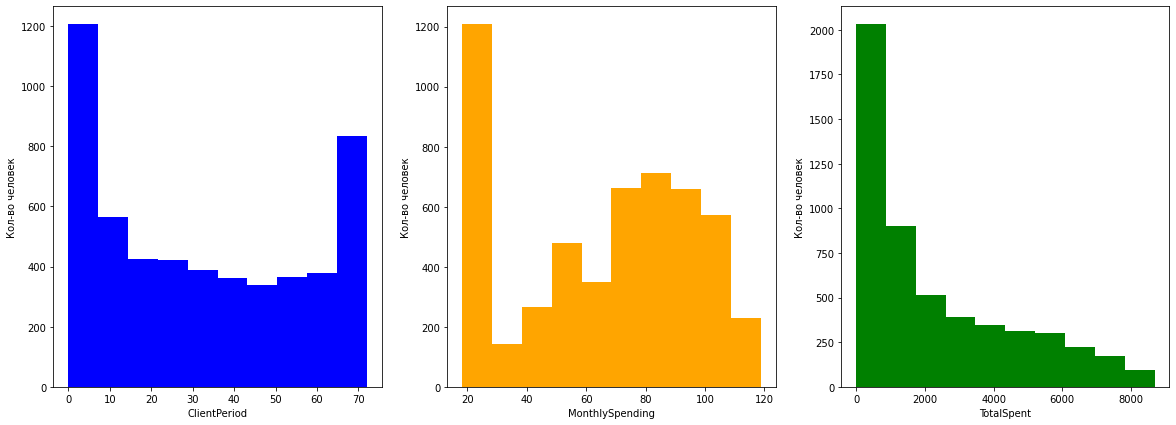

In [ ]:
data[num] = data[num].astype(float)
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.subplot(1, 3, 1).set_xlabel(num[0])
plt.subplot(1, 3, 1).set_ylabel('Кол-во человек')
plt.hist(data[num[0]], color='blue')
plt.subplot(1, 3, 2)
plt.subplot(1, 3, 2).set_xlabel(num[1])
plt.subplot(1, 3, 2).set_ylabel('Кол-во человек')
plt.hist(data[num[1]], color='orange')
plt.subplot(1, 3, 3)
plt.subplot(1, 3, 3).set_xlabel(num[2])
plt.subplot(1, 3, 3).set_ylabel('Кол-во человек')
plt.hist(data[num[2]], color='green')
None

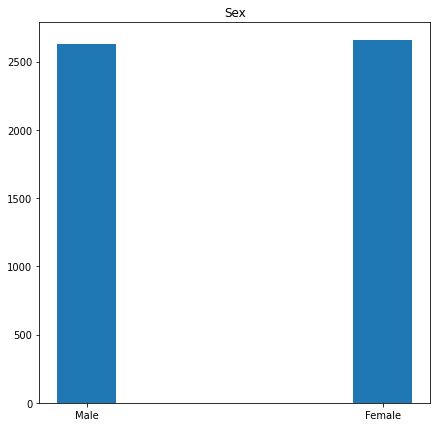

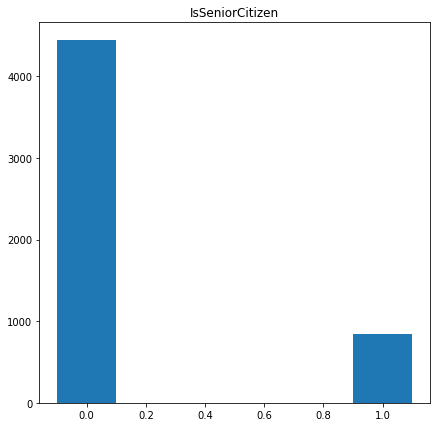

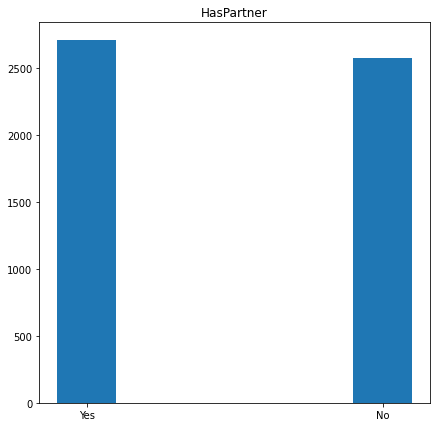

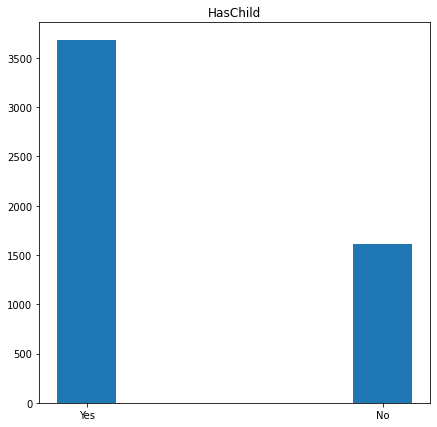

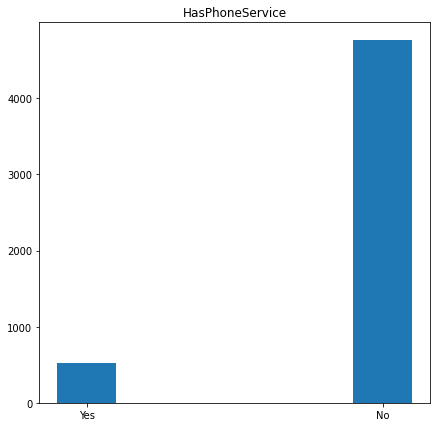

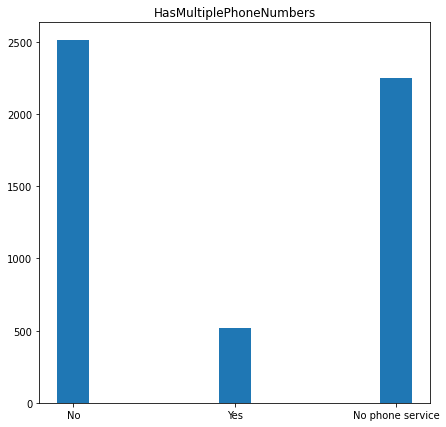

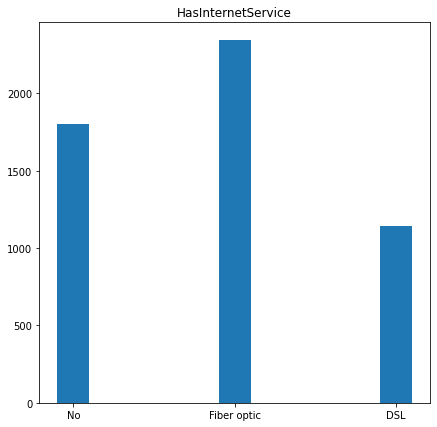

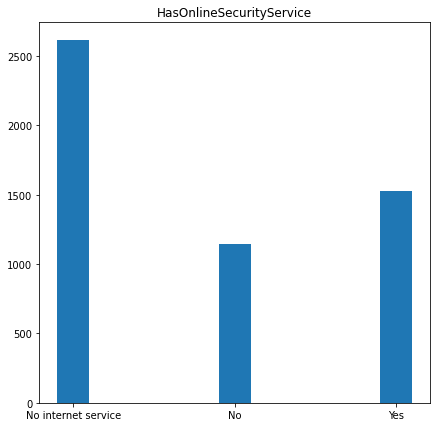

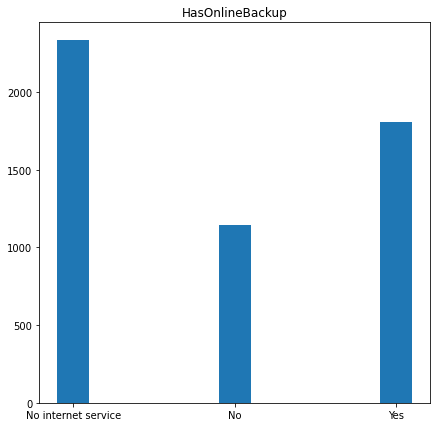

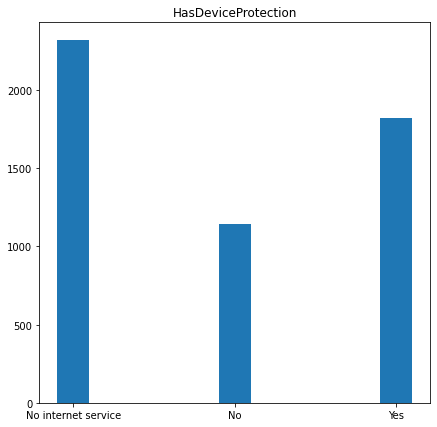

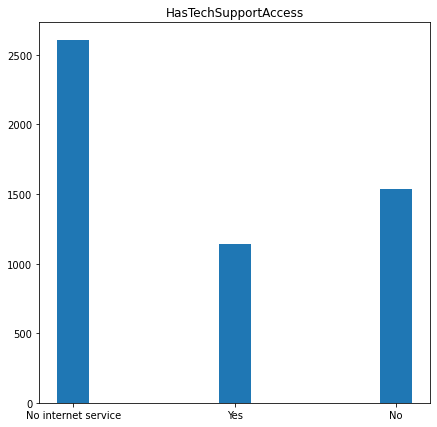

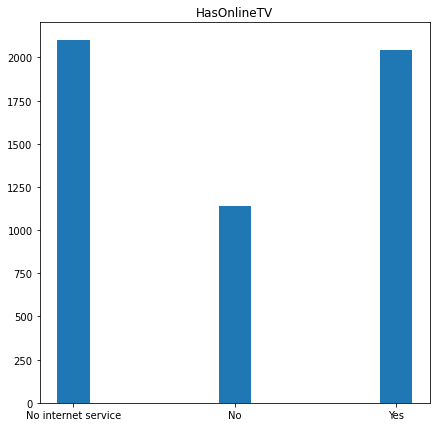

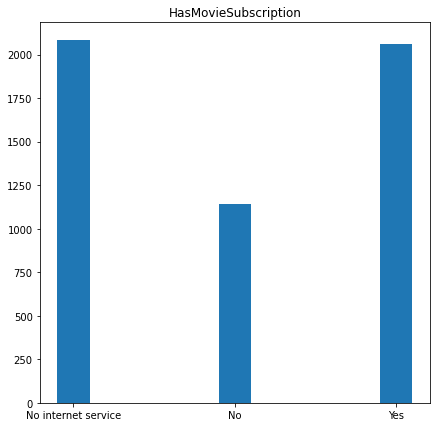

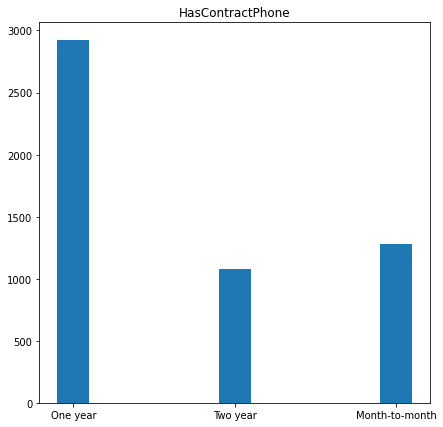

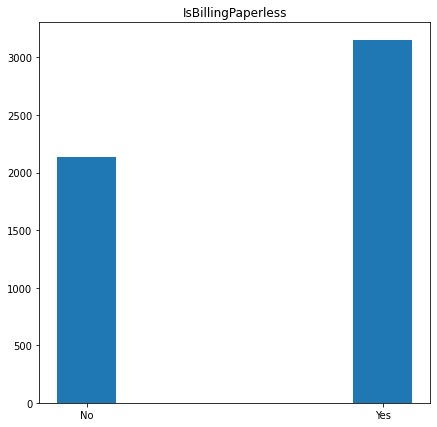

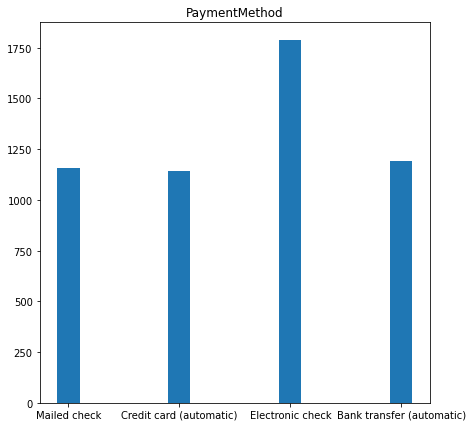

In [ ]:
from IPython.core.pylabtools import figsize
for i in range(len(cat)):
    x = (data[cat][cat[i]].unique())
    y = pd.get_dummies(data[cat][cat[i]]).sum()
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax.set_title(cat[i])
    ax.bar(x, y, width = 0.2)
    plt.show()

Visualisation of target (1 is churn, 0 is loyal customer)

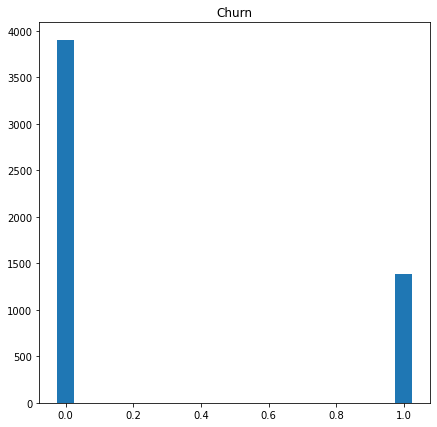

0    3898
1    1384
Name: Churn, dtype: int64

Part of churn customers: 0.26202196137826583


In [ ]:
x = (data[target].unique())
y = pd.get_dummies(data[target]).sum()
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.set_title(target)
ax.bar(x, y, width = 0.05)
plt.show()
print((data[target].value_counts()))
print()
print('Part of churn customers:', y[1]/(y[0] + y[1]))

Normalization of numeric features

In [ ]:
nums = pd.DataFrame()
for col in num:
  nums[col] = round((data[col] - data[col].mean())/data[col].std(), 6)
nums

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920680,-1.505304,-0.555799
1,1.613135,-1.294875,-0.183022
2,-1.278884,0.363702,-0.974675
3,-0.016171,0.476373,0.124508
4,1.124343,1.667699,1.970413
...,...,...,...
5277,-1.197418,-1.144095,-0.971921
5278,0.717017,-0.678501,-0.043647
5279,-1.278884,-0.327234,-0.983864
5280,-0.138369,0.367016,-0.031835


One-hot-Encoding for categorical features

In [ ]:
dummies = pd.get_dummies(data[cat])

Concatenate new numerical and categorical features

In [ ]:
new_data = pd.concat([nums, dummies], axis = 1)
target1 = data[target]

LogisticRegressionCV with sklearn

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_data, target1)
model = LogisticRegressionCV(scoring = 'roc_auc', refit = True)

model.fit(x_train, y_train)

LogisticRegressionCV(scoring='roc_auc')

In [ ]:
model.score(x_train, y_train)

0.851360391237972

In [ ]:
model.score(x_test, y_test)

0.8421732458010062

Let's try Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
model1 = RidgeClassifier()
model1.fit(x_train, y_train)

RidgeClassifier()

In [ ]:
model1.score(x_train, y_train)

0.8101489522847766

In [ ]:
model1.score(x_test, y_test)

0.7940953822861468

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree.score(x_train, y_train)

0.9984852310022722

In [ ]:
dec_tree.score(x_test, y_test)

0.7146101438304315

Let's try GridSearchCV to improve Decision tree

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(1, 7),

}

search = GridSearchCV(dec_tree, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [ ]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [ ]:
dec_tree.score(x_train, y_train)

0.8003029537995455

In [ ]:
dec_tree.score(x_test, y_test)

0.7842543527630583